# 3. DATA SET MANAGEMENT


(by Tomislav Kartalov, FEEIT, CMUS, Macedonia)


In this chapter, you will learn to **create the data manually** or to **import** it from an existing source, and to **format** it to suit specific needs. The tools required are **Jupyter Notebook**, **Python** and **Google Forms**.

The libraries that you will use in this chapter, are: 
- the pandas library for data manipulation and analysis, 
- the numpy library for high level mathematical functions






In [1]:
import pandas as pd
import numpy as np

## 3.1. Creating the data set manually

The data set can be created by manual means, such as **survey** or **poll**. If the data set contains technical or natural data, it can be created using measurements, sensors, observations, and other data acquisition devices and methods.

The proper organization of the survey, smart question selection, balanced structure of the responders (age, sex, ethnicity...), and anonymity of the responses, are of utmost importance for obtaining usable data set with high quality. However, the explanation of all these criteria vastly exceeds the scope of this course. For the sake of simplicity, we will generally ignore those criteria, and in return, it can not be stated that the conclusions drawn here bear any meaning in the real world. For example, if you conduct a survey in your classroom for the most used social media platforms, you may conclude from the data that TikTok greatly outperforms Instagram. However, this result would be biased, because the responders of your survey would be mainly teenagers, and you did not include balanced age groups. In the real world, when this text is written, Instagram is twice as big as TikTok, but TikTok dominates the young population. If you want to draw valid conclusions, you should opt for a data set created by professional bodies, where large and balanced numbers of responders were included. 
With this discussion out of the way, let's see how to create a data set manually.

### 3.1.1. Creating the data set REALLY manually

If you obtained your data in some old fashion way (e.g. on paper), you will have to enter the data in a digital form and create the data set by hand. This process is slow and laborious, and, especially if you work alone, can be used only for very small data sets. 

Let's say that you have asked your friends about their social media habits, and you compiled a list like this:

<figure>
<img src="https://github.com/VALENCEML/eBOOK/raw/main/EN/03/HandWrittenList.png" width="500px;"/> 
<figcaption align = "left"> Handwritten list </figcaption>
</figure>

Because you used a piece of paper to gather the data, now you should convert it into digital data.

First, let's observe the entries. A human can easily make resolve of this data, but you can spot the inconsistencies that can be puzzling to a computer. For instance, if you try to compute the average time that your friends spend daily on the social media platform, this data is ill-prepared for such calculation, because some of the times are entered in hours, others in minutes. Furthermore, if you want to come up with the statistics of social media platform usage, the computer will consider **FB** and **Facebook** as two different platforms, although you know that those two should be added together. (Same for Insta/Instagram, or YT/YouTube...). This urges us to insist on consistent entries, perhaps we can prepare the lists of possible options even before we start digitizing the data. Let's say that we agreed on the following rules:
- the gender will be represented by the uppercase letter M or F
- the time will be represented by a whole number in minutes (without the unit, just a number)
- the platform will be represented by a string of letters, exclusively found on this list: Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat.

After all this consideration, you can finally create the data set:

In [77]:
friends = pd.DataFrame(columns=['Name','Gender', 'Time Daily [min]', 'Platform'])

The data set is called ***friends***, and now is empty. To add the first row in the data set, the 'append' command can be used:

In [78]:
friends = friends.append({'Name': 'Zdravko','Gender': 'M', 'Time Daily [min]': '60',  'Platform': 'Facebook'}, ignore_index=True)
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook


The 'append' command can support adding multiple rows in the data set simultaneously, however, someone still has to type them by hand:

In [79]:
friends = friends.append(pd.DataFrame({
                'Name': ['Aleksandra','Ivan'],
                'Gender': ['F','M'], 
                'Time Daily [min]': ['90','120'],  
                'Platform': ['Instagram','TikTok']
                }) , ignore_index=True)
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok


A faster and more convenient way to add just one row is the following syntax:

In [80]:
friends.loc[len(friends.index)] = ['Artim','M', '30', 'Facebook']
friends


,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook


You can even write a small looping code which can help you with semi-automatic entering of the data. Try and finish the list above, or add some of your friends to the data set. Add at least 4 additional people, to obtain a data set with at least 8 records (important for future demonstrations, in Section 3.3.)

In [83]:
keepgoing = True  #initialisation
while keepgoing:  # perform all following commands while keepgoing is True
  Name = input("Name?")
  Gender = input("Gender? [M/F]")
  TimeD = input("Average time spent daily? [in minutes]")
  Platform = input("Social media platform? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]")
  AnotherRecord = input("Make another entry? [y/n]")
  friends.loc[len(friends.index)] = [Name, Gender, TimeD, Platform]
  if AnotherRecord == 'n':
    keepgoing = False # when the user enters 'n', that breaks the loop
friends

Name?Tomas
Gender? [M/F]M
Average time spent daily? [in minutes]60
Social media platform? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]Instagram
Make another entry? [y/n]y
Name?Sonja
Gender? [M/F]F
Average time spent daily? [in minutes]120
Social media platform? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]YouTube
Make another entry? [y/n]y
Name?Sara
Gender? [M/F]F
Average time spent daily? [in minutes]100
Social media platform? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]Instagram
Make another entry? [y/n]y
Name?Carrie
Gender? [M/F]F
Average time spent daily? [in minutes]120
Social media platform? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]TikTok
Make another entry? [y/n]y
Name?Billy
Gender? [M/F]M
Average time spent daily? [in minutes]30
Social media platform? [Facebook/Instagram/YouTube/TikTok/WhatsApp/WeChat]Facebook
Make another entry? [y/n]n


,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Tomas,M,60,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Billy,M,30,Facebook


Now you have your data set. You will learn about analyzing and visualizing the data in the future chapters, but for now, just a small teaser:


Text(0.5, 1.0, 'Social media platforms of my friends')

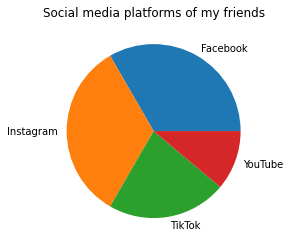

In [84]:
from matplotlib import pyplot as plt
counts = friends.Platform.value_counts()
plt.pie(counts, labels=friends.Platform.value_counts().index.tolist())
plt.title("Social media platforms of my friends") 

Your data set exists in a dataframe (kind of a multidimensional variable) in the working memory of the computer. When you leave this session, all the data will be lost. If you want to save and download the data for future use, this can be done with the following commands:

In [87]:
from google.colab import files
friends.to_csv('friends.csv', encoding = 'utf-8-sig', index=False)
files.download('friends.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After this, the data set is saved locally on the computer disk, and in your next session you can import it and continue to work with it.

*Further practice*: try to create your own data set, with another parameters (some ideas: months of birth, eye or hair colors, favorite music genre...). Conduct a survey among your friends, create the data set from it, and save it for future use! Find the file on your computer, open it (any text editor can open csv files, or you can use a spreadsheet editor, like Excel or Calc), and see the structure of the data inside. If you want, in the future demonstrations you can work with your own data, but make sure that it has at least 8 records, for compatibility.



### 3.1.2. Creating the data set NOT SO manually

As it was demonstrated in the previous section, creating the data set by manual input is a very slow and laborious process. Yet, by learning it you adopted useful skills for data management, knowledge about data structuring, and the need for data consistency. 
Now, imagine that you want to expand your survey to your class, or even to your whole school. The manual entering of the data becomes nearly impossible for such large pools of responders. The solution for this problem is to use some online form or questionnaire that can be distributed to large number of responders via the Internet, using only an URL - which can be easily distributed by social media, or by chat engines like Viber or Telegram, or more traditionally, by e-mail.

The professional data collectors make their own specialized online forms for the surveys they conduct. However, there are some free tools available to the public, that are very convenient too. One of the best, and most commonly used tools for data collection is [**Google Forms**](https://docs.google.com/forms). 

Let's try to create the same survey from the previous section, using Google Forms. If you click the link above, it will open a new tab in your browser, the Google Forms homepage, where you can choose from some of the form templates, or simply open a blank form. If you already have used this tool, your previously created forms will appear od this page also.

Now, open a new blank form, and the following interface will appear:


<figure>
<img src="https://github.com/VALENCEML/eBOOK/raw/main/EN/03/UntitledGoogleForm.png" width="500px;"/> 
<figcaption align = "left"> Blank Google Form </figcaption>
</figure>

In this intuitive interface, the title and description of the form can be entered, as well as the questions. For the sake of anonymity, let's replace the *Name* question from the previous survey, with the year of studies. For the questions that have a limited number of possible answers, like the year of studies, Google Forms offer various types of questions with provided lists of answers, like multiple choice, checkboxes, or dropdown. This is making data consistency very easy to secure (unlike the manual entering of the data).

<figure>
<img src="https://github.com/VALENCEML/eBOOK/raw/main/EN/03/TitledGoogleForm.png" width="500px;"/> 
<figcaption align = "left"> Answers are limited to a specific list of options </figcaption>
</figure>

The plus sign on the right-hand menu, pointed with red arrow on the figure, adds a new question. The rest of the questions can be something like this, but be free to experiment with your own ideas.

<figure>
<img src="https://github.com/VALENCEML/eBOOK/raw/main/EN/03/Questions2to4.png" width="500px;"/> 
<figcaption align = "left"> Rest of the questions </figcaption>
</figure>

When the form is ready, the **Send** button in the upper right corner opens the send interface, where the means of the form distribution can be adjusted. It can be distributed via e-mail, or via link that can be copied and distributed on any platform, or the form can be embedded in a website.

*Exercise:* Work in teams. Divide the class into 4 teams (for larger classes number of teams can be higher). Each team should come up with an idea for a survey, and make a form for data collection. Then, the forms are distributed to the class and EVERY student answers all 4 forms. 

After the completion of the polling period, the results can be downloaded from the *Responses* section on the top of the form editing window, and can be downloaded, preferably in the *csv* (comma separated) file format. 

*Further reading:* more info and help on the Google Forms can be found [here](https://support.google.com/docs).




## 3.2. Importing the data set

Here, you will learn how to import an already existing data set. It can be created by you, or by other people or institutions, and it is saved permanently as a file on your computer or somewhere on the Internet. The most common file format for data keeping is the *csv* format, which stands for **C**omma **S**eparated **V**alues. The *csv* format has several advantages over other data storage, some of them are its simplicity, accessibility through standard editors, and comprehensibility (when you open it, you instantly know what's what). If you did the exercise suggested at the end of Section 3.1.1 and opened such file with some program (text or spreadsheet editor), you are already familiar with the internal structure of that file format. Usually the first line is the header of the table (names or descriptions of the data, by columns), and all the following lines are the data itself, each piece of data separated from its surrounding by a comma.

Let's try to import your own data set that you manually created and saved. Put it in another dataframe, *friends_imported*. Check visually to confirm that it is the same data. Is there any difference?

In [133]:
friends_imported = pd.read_csv('friends.csv')
friends_imported

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Tomas,M,60,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Billy,M,30,Facebook


In [90]:
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Tomas,M,60,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Billy,M,30,Facebook


Actually, there IS a difference between the original and the imported data frame, but it is invisible to the human eye. To see it, run the following:

In [134]:
t = friends.dtypes   # this lists the types of data in each column
t

Name                object
Gender              object
Time Daily [min]    object
Platform            object
dtype: object

Let's try the same for the imported data frame:

In [135]:
t2 = friends_imported.dtypes
t2


Name                object
Gender              object
Time Daily [min]     int64
Platform            object
dtype: object

Now, do you see the difference? The reason for this is the conversion of the type of the *Time Daily [min]* parameter. In our data frame we entered the times as *text* (we entered '60', and not 60). Saving it in a *csv* file, and then reading it back, transformed the times in numbers, because *pandas* assumed that if something is written as a number, it should be kept as a number.Beware of this behaviour! As a rule of thumb, **it is always wise to check the types** of your data, especially if you are importing it!!! We will return to this discussion in section 3.3.2.1.

*Further practice:* Although the *csv* format is most commonly used for data storage, it has its own limitations when more complex data structures need to be stored. *The *pandas* library offers support for several data storage formats, alongside *csv*, it can also read *excel*, *sql*, *json*, *html*, and other types of files. Try to save, and then read your own data set in some of the other formats.  In between check the file stored on the computer, and observe its internal structure. 
Here are some suggestions: 
- *dataframe*.to_excel / pd.read_excel
- *dataframe*.to_json / pd.read_json
- *dataframe*.to_html / pd.read_html
- *dataframe*.to_xml / pd.read_xml

The usage is similar to what you already learned above, however, if you need them, you can find the detailed instructions [here](https://pandas.pydata.org/docs/reference/io.html).


### 3.2.1. Online data services


In some instances, it will be impossible to create your own data sets. You can obtain extensive and professionally created datasets from some of the online data services. Here are few, that could be useful to know:
- [kaggle](https://www.kaggle.com/datasets), (miscellaneous data, by community sources)
- [Google Dataset](https://datasetsearch.research.google.com/), (miscellaneous data, by Google)
- [Global Health](https://apps.who.int/gho/data/node.home), (health data, by WHO)
- [Datahub.io](https://datahub.io/collections), (mostly business and finance)
-[CrimeExplorer](https://crime-data-explorer.fr.cloud.gov/), (crime data, by FBI)
- [EarthData](https://earthdata.nasa.gov/), (environmental data, by NASA)
- [CERN open data](http://opendata.cern.ch/), (particle physics data, by CERN)


Some of these services require free registration (user account), others are accesible without registration.


## 3.3. Management of the data set

Now you know how to create, save and import your data. Before you can jump into analytics and processing, you should know a few more basic things about the management of your data set.

### 3.3.1. Accessing selected parts of the data

For reference, here is the whole data set again:  

In [94]:
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Tomas,M,60,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Billy,M,30,Facebook


The first column with no name above is the index column. To access a specific record from the data set, the *loc* operator can be used. This operator works with the index of the required record. 

In [95]:
friends.loc[3]

Name                   Artim
Gender                     M
Time Daily [min]          30
Platform            Facebook
Name: 3, dtype: object

If you don't need all the data for that record, but you need only one piece of information, then you can specify that:

In [96]:
friends.loc[3,'Platform']

'Facebook'

Also, multiple indices can be accessed simultaneously, ordered or arbitrary:

In [97]:
friends.loc[2:4]

,Name,Gender,Time Daily [min],Platform
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Tomas,M,60,Instagram


In [98]:
friends.loc[{0,6,4,7}]

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
4,Tomas,M,60,Instagram
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok


Above examples show how to acces the data by rows. If the columns should be accessed, for example, you want to see all the names in the dataset, then:

In [99]:
friends['Name']

0       Zdravko
1    Aleksandra
2          Ivan
3         Artim
4         Tomas
5         Sonja
6          Sara
7        Carrie
8         Billy
Name: Name, dtype: object

For extracting multiple columns from a data set, a list should be used - curly brackets {}.

In [100]:
friends[{'Gender','Platform'}]

,Platform,Gender
0,Facebook,M
1,Instagram,F
2,TikTok,M
3,Facebook,M
4,Instagram,M
5,YouTube,F
6,Instagram,F
7,TikTok,F
8,Facebook,M


Sometimes, you don't know the index of the record that you wish to see, but you know some other information. In that case, instead of putting a number as index, you can use a logical criterion.

In [101]:
friends['Name']=='Ivan'

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7    False
8    False
Name: Name, dtype: bool

If you use this output as index, the *loc* operator will give you **only** the records where the condition is true

In [102]:
friends.loc[friends['Name']=='Ivan']

,Name,Gender,Time Daily [min],Platform
2,Ivan,M,120,TikTok


You can also use this trick to filter the data set. For example, let's see who uses TikTok:

In [103]:
friends.loc[friends['Platform']=='TikTok']

,Name,Gender,Time Daily [min],Platform
2,Ivan,M,120,TikTok
7,Carrie,F,120,TikTok


Observe how in all these cases you get subsets of the original data set. Each of them inherits the original indices, thus, could be used as separate data set if needed. For that purpose, the selected subset can be assigned to a new data frame.

*Exercise:* try your own ideas for displaying only subsets of the data, and for filtering the data using different criteria.

### 3.3.2. Modyfing the data

When you have mastered the data accessing techniques, modifying the data is very simple. Modifying is just assigning a new value to a selected data. Let's try to replace one record (e.g. index = 4) with another. 

Accesing (selecting) the record:

In [104]:
friends.loc[4]

Name                    Tomas
Gender                      M
Time Daily [min]           60
Platform            Instagram
Name: 4, dtype: object

And assigning a new value(s) to the selected record:

In [105]:
friends.loc[4] = ['Maryna','F','80','Instagram']
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Maryna,F,80,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Billy,M,30,Facebook


If only one value need to be modified, all the above discussed selection criteria apply. Modifying a value in a fixed row (known index):

In [106]:
friends.loc[4, 'Time Daily [min]'] = '120'
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Maryna,F,120,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Billy,M,30,Facebook


Modifying a value in a row based on a rule (unknown index):

In [128]:
friends.loc[friends['Name']=='Maryna', 'Name'] = 'Marina'  # actually, this is "find and replace" function!
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Tomas,M,30,Facebook


Use this wisely, because **there is no "undo"** button! If the rule is met for multiple rows, **all of them will be modified**!

In [129]:
friends2 = friends.copy()  # first, let's copy the data in another dataframe...
friends2.loc[friends2['Gender']=='M', 'Name'] = 'Oliver'  # ...because this command practically destroys the data! (Unless you are sure that all the males are actually named Oliver!)
friends2

,Name,Gender,Time Daily [min],Platform
0,Oliver,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Oliver,M,120,TikTok
3,Oliver,M,30,Facebook
4,Marina,F,120,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Oliver,M,30,Facebook


*Exercise:* Did you make some errors when you entered your friends manually? Maybe some letter slipped in the numbers? Or maybe you wrote "M<" for the gender? Try to clean up the data and fix any errors, by modifuyng the data frame!

#### 3.3.2.1. Adjusting the type of data

The created data frame contains some numbers. Let's try to make some calculation with them, e.g. to obtain the average daily time on social media, for all participants in the poll.

In [148]:
friends['Time Daily [min]'].mean()


6.766800334668001e+21

Do you think this number is accurate? You can check it by hand calculation, using the whole data frame.

In [151]:
friends

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,120,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Tomas,M,30,Facebook


There is obviously some problems with this calculation. Now let's try the same calculation with the imported data frame:

In [149]:
friends_imported['Time Daily [min]'].mean()

81.11111111111111

This looks like an accurate number. The problem with the calculated average time from the original data frame is in the data type of the column 'Time Daily [min]'

In [152]:
t = friends.dtypes
t

Name                object
Gender              object
Time Daily [min]    object
Platform            object
dtype: object

Because we entered the times in minutes as text, they are stored as a strings of characters. '60' minutes is not the number 60, but the characters '6' and '0', which puzzles the calculation and it returns such an illogical number. The solution of this problem is converting (casting) all the daily times in the dataset in numbers. That can be performed by:

In [174]:
friends['Time Daily [min]'] = friends['Time Daily [min]'].apply(pd.to_numeric)
t = friends.dtypes
t


Name                object
Gender              object
Time Daily [min]     int64
Platform            object
dtype: object

Now let's try again:

In [154]:
friends['Time Daily [min]'].mean()

87.77777777777777

Does this number look like your manual calculation?

If the conversion in the opposite direction is needed (numbers to strings), then the command becomes:

In [155]:
friends['Time Daily [min]'] = friends['Time Daily [min]'].apply(str)
t = friends.dtypes
t


Name                object
Gender              object
Time Daily [min]    object
Platform            object
dtype: object

The same outcome can be reached if a textual value is assigned to some numeric field in the data frame, then *pandas* will automatically convert the field into string. However, this approach is not recommended, because a slight negligence can lead to chaotic data types throuout the data set.

### 3.3.3. Deleting (some of) the data

Sometimes, parts of the data frame are no longer needed, or should be excluded from the further analysis. One way to do that is to select the relevant portion of the data frame and to assign it to another (new) data frame, but in some cases the simpler solution is to erase the unnecessary data.



In [186]:
friends2 = friends.copy()   # don't destroy the original data set, make a new one
friends2

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,38,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Tomas,M,30,Facebook


For partial deletion of the data, the *drop* operator is used. 
Deleting a fixed record (known index):

In [187]:
friends2.drop([5])

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,38,Instagram
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Tomas,M,30,Facebook


Observe how the original indices remain. The data set is not re-indexed after a record removal.
Multiple records deletion:

In [188]:
friends2.drop([0, 3, 7])

,Name,Gender,Time Daily [min],Platform
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
4,Marina,F,38,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
8,Tomas,M,30,Facebook


Observe that the row with index=5 is now back in the data. This is because the above result was performed on a secure copy of the data frame, and not on the data frame itself. Since you have already copied the original data, you can force the permanent deletion in the data frame itself, by using the *inplace* operator.

In [208]:
friends2.drop([0, 3, 7],inplace=True)
friends2 # note that now the result must be explicitly printed, to see it

,Name,Gender,Time Daily [min],Platform
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
4,Marina,F,38,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
8,Tomas,M,30,Facebook


Deletion by rule (unknown index):

In [209]:
friends2.drop(friends2[friends2['Gender']=='F'].index, inplace=True)   # remove all females from the data 
friends2

,Name,Gender,Time Daily [min],Platform
2,Ivan,M,120,TikTok
8,Tomas,M,30,Facebook


Removal of column(s):

In [212]:
friends2 = friends.copy()   # bring back the data
friends2


,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
1,Aleksandra,F,90,Instagram
2,Ivan,M,120,TikTok
3,Artim,M,30,Facebook
4,Marina,F,38,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Tomas,M,30,Facebook


The parameter *axis=1* must be specified for column deletion. It can also be specified for rows (*axis=0*) deletion, but if it is not specified, the assumption is that rows are being deleted.

In [213]:
friends2.drop(['Name'], axis=1, inplace=True)  # making the data set anonimous
friends2

,Gender,Time Daily [min],Platform
0,M,60,Facebook
1,F,90,Instagram
2,M,120,TikTok
3,M,30,Facebook
4,F,38,Instagram
5,F,120,YouTube
6,F,100,Instagram
7,F,120,TikTok
8,M,30,Facebook


*Exercise:* Try to remove all the records of people that spent below average time on social media.

### 3.3.4. Combining the data

In some situations, data from multiple sources should be combined into one data set. To simulate that scenario, run the following:


In [261]:
friends1 = friends.copy()  
friends2 = friends.copy()  
friends1.drop([0, 2, 5],inplace=True)
friends2.drop([1, 3, 7],inplace=True)
friends1


,Name,Gender,Time Daily [min],Platform
1,Aleksandra,F,90,Instagram
3,Artim,M,30,Facebook
4,Marina,F,38,Instagram
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Tomas,M,30,Facebook


In [251]:
friends2

,Name,Gender,Time Daily [min],Platform
0,Zdravko,M,60,Facebook
2,Ivan,M,120,TikTok
4,Marina,F,38,Instagram
5,Sonja,F,120,YouTube
6,Sara,F,100,Instagram
8,Tomas,M,30,Facebook


Now you have two different data sets.The *concat* operator joins these two sets into one.

In [223]:
friends_all = pd.concat([friends1, friends2])
friends_all

,Name,Gender,Time Daily [min],Platform
1,Aleksandra,F,90,Instagram
3,Artim,M,30,Facebook
4,Marina,F,38,Instagram
6,Sara,F,100,Instagram
7,Carrie,F,120,TikTok
8,Tomas,M,30,Facebook
0,Zdravko,M,60,Facebook
2,Ivan,M,120,TikTok
4,Marina,F,38,Instagram
5,Sonja,F,120,YouTube


Observe how the index order is ruined, and the new data set has non unique indices. This is not a problem for operations with the data, but you have to be very careful, because now multiple records can have the same index.
If you want the new data set to rebuild its own, new indices, than the *ignore_index* switch should be used:

In [225]:
friends_all = pd.concat([friends1, friends2], ignore_index = True)
friends_all

,Name,Gender,Time Daily [min],Platform
0,Aleksandra,F,90,Instagram
1,Artim,M,30,Facebook
2,Marina,F,38,Instagram
3,Sara,F,100,Instagram
4,Carrie,F,120,TikTok
5,Tomas,M,30,Facebook
6,Zdravko,M,60,Facebook
7,Ivan,M,120,TikTok
8,Marina,F,38,Instagram
9,Sonja,F,120,YouTube


Or, if you want to keep old indices, but still want uniquely accessible records, then you can add another index, with greater hiererchical importance than the old one.

In [242]:
friends_all = pd.concat([friends1, friends2], keys=['fr1','fr2'])
friends_all

Name Gender Time Daily [min]   Platform Test Score
fr1 1  Aleksandra      F               90  Instagram        NaN
    3       Artim      M               30   Facebook        NaN
    4      Marina      F               38  Instagram        NaN
    6        Sara      F              100  Instagram        NaN
    7      Carrie      F              120     TikTok        NaN
    8       Tomas      M               30   Facebook        NaN
fr2 0     Zdravko      M              NaN   Facebook         60
    2        Ivan      M              NaN     TikTok        120
    4      Marina      F              NaN  Instagram         38
    5       Sonja      F              NaN    YouTube        120
    6        Sara      F              NaN  Instagram        100
    8       Tomas      M              NaN   Facebook         30

Now, each record is uniquely accessible, and can be assigned unique value:

In [239]:
friends_all.loc['fr1'].loc[4,'Platform'] = 'TikTok'
friends_all.loc['fr2'].loc[4,'Platform'] = 'Instagram'
friends_all

Name Gender Time Daily [min]   Platform
fr1 1  Aleksandra      F               90  Instagram
    3       Artim      M               30   Facebook
    4      Marina      F               38     TikTok
    6        Sara      F              100  Instagram
    7      Carrie      F              120     TikTok
    8       Tomas      M               30   Facebook
fr2 0     Zdravko      M               60   Facebook
    2        Ivan      M              120     TikTok
    4      Marina      F               38  Instagram
    5       Sonja      F              120    YouTube
    6        Sara      F              100  Instagram
    8       Tomas      M               30   Facebook

What about the data sets have different structures? Let's assume that you have two data sets, one is about the social media presence, and another is about test scores. Two data sets have some of the records that overlap, but others are different. To ilustrate such scenario, first, run the following changes on *friends2*:

In [294]:
friends2['Time Daily [min]'] = friends2['Time Daily [min]'].apply(pd.to_numeric)
friends2 = friends2.rename(columns={'Time Daily [min]':'Test Score'}) # renaming the column
friends2['Test Score'] = friends2['Test Score'] + 48   # changing the values in column, to be different from the previous (just for visual appearance)
friends2

,Name,Gender,Test Score,Platform
0,Zdravko,M,306,Facebook
2,Ivan,M,366,TikTok
4,Marina,F,284,Instagram
5,Sonja,F,366,YouTube
6,Sara,F,346,Instagram
8,Tomas,M,276,Facebook


Now, the combination of the two data sets results in:

In [295]:
friends_all = pd.concat([friends1, friends2])
friends_all

,Name,Gender,Time Daily [min],Platform,Test Score
1,Aleksandra,F,90,Instagram,NaN
3,Artim,M,30,Facebook,NaN
4,Marina,F,38,Instagram,NaN
6,Sara,F,100,Instagram,NaN
7,Carrie,F,120,TikTok,NaN
8,Tomas,M,30,Facebook,NaN
0,Zdravko,M,NaN,Facebook,306
2,Ivan,M,NaN,TikTok,366
4,Marina,F,NaN,Instagram,284
5,Sonja,F,NaN,YouTube,366


Note the *NaN*'s. The parameters that are not avalilable, in the joined data set are represented by *NaN*.
This result is somewhat usable, but to truly merge the data, several more steps are required. First, let's found the records that exist in both initial data sets.

In [296]:
friends_common = friends1.merge(friends2,on=['Name','Gender','Platform'])  # assume that Name, Gender and Platform would be same in both data sets, because those are the same people.
friends_common


,Name,Gender,Time Daily [min],Platform,Test Score
0,Marina,F,38,Instagram,284
1,Sara,F,100,Instagram,346
2,Tomas,M,30,Facebook,276


Then, let's delete those records from the joined data_set. One by one, all the names from the *friends_common* are checked in *friends_all* and all the records with that name are deleted.

In [297]:
for i in range (len(friends_common.index)):   
  friends_all.drop(friends_all[friends_all['Name']==friends_common.loc[i,'Name']].index, inplace=True)  # try to analyze and understand this code, multiple concepts of selecting, deleting and assigning are used in the same row!
friends_all

,Name,Gender,Time Daily [min],Platform,Test Score
1,Aleksandra,F,90,Instagram,NaN
3,Artim,M,30,Facebook,NaN
7,Carrie,F,120,TikTok,NaN
0,Zdravko,M,NaN,Facebook,306
2,Ivan,M,NaN,TikTok,366
5,Sonja,F,NaN,YouTube,366


In the end, the common names should be added to the rest of the data:

In [298]:
friends_all = pd.concat([friends_all, friends_common],ignore_index=True)
friends_all

,Name,Gender,Time Daily [min],Platform,Test Score
0,Aleksandra,F,90,Instagram,NaN
1,Artim,M,30,Facebook,NaN
2,Carrie,F,120,TikTok,NaN
3,Zdravko,M,NaN,Facebook,306
4,Ivan,M,NaN,TikTok,366
5,Sonja,F,NaN,YouTube,366
6,Marina,F,38,Instagram,284
7,Sara,F,100,Instagram,346
8,Tomas,M,30,Facebook,276


The data is fully merged, and for people that exist in both data sets, the records are completely filled.

*Exercise:* from the *friends_all* dataset select all the records that do not contain data for the 'Time Daily [min]', in a separate data frame. Then put the test scores as times (by renaming and deleting the columns), and add those records back to the *friends_all* dataset, at the bottom of the table.